In [1]:
# Importing essential libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Defining the connection string for Windows Authentication (Trusted Connection)
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=DESKTOP-OLQ2EC3\SQLEXPRESS;'
    r'DATABASE=db_capstone;'
    r'Trusted_Connection=yes;'
)

In [4]:
# Establishing the connection
conn = pyodbc.connect(conn_str)

In [5]:
# SQL query to fetch the required data (modify as needed)
query = '''
    SELECT * from Loan_Approval_Prediction;
'''

In [6]:
# Fetching data from the database into a pandas DataFrame
df = pd.read_sql(query, conn)

In [7]:
# Closing the connection after fetching the data
conn.close()

In [8]:
# Displaying the first few rows of the data
print(df.head())

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male   False         0.0      Graduate         False   
1  LP001003   Male    True         1.0      Graduate         False   
2  LP001005   Male    True         0.0      Graduate          True   
3  LP001006   Male    True         0.0  Not Graduate         False   
4  LP001008   Male   False         0.0      Graduate         False   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

  Credit_History Property_Area  Loan_Status  
0           True         Urban         True  
1           True         Rural        False  
2           Tr

# Initiating Data Cleaning

In [9]:
# Replace all null (NaN) values with 0
df.fillna(0, inplace=True)

In [10]:
# Replace all True with 1 and False with 0 in the entire DataFrame
df.replace({True: 1, False: 0}, inplace=True)

In [11]:
# Convert the following columns to integers
columns_to_convert = ['Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Status']

# Cast the selected columns to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [12]:
# Display the first few rows of the updated DataFrame
print(df.head())

    Loan_ID Gender  Married  Dependents     Education  Self_Employed  \
0  LP001002   Male        0           0      Graduate              0   
1  LP001003   Male        1           1      Graduate              0   
2  LP001005   Male        1           0      Graduate              1   
3  LP001006   Male        1           0  Not Graduate              0   
4  LP001008   Male        0           0      Graduate              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         0.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0               1         Urban            1  
1               1         Rural            0  

In [13]:
# Check for missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
# Descriptive statistics of numeric columns
print(df.describe())

          Married  Dependents  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000     614.000000       614.000000   
mean     0.648208    0.744300       0.133550      5403.459283   
std      0.477919    1.009623       0.340446      6109.041673   
min      0.000000    0.000000       0.000000       150.000000   
25%      0.000000    0.000000       0.000000      2877.500000   
50%      1.000000    0.000000       0.000000      3812.500000   
75%      1.000000    1.000000       0.000000      5795.000000   
max      1.000000    3.000000       1.000000     81000.000000   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
count         614.000000  614.000000        614.000000      614.000000   
mean         1621.245798  141.166124        334.201954        0.773616   
std          2926.248369   88.340630         82.183884        0.418832   
min             0.000000    0.000000          0.000000        0.000000   
25%             0.000000   98.000000        

In [15]:
# Displaying the shape of the data
print(df.shape)

(614, 13)


In [16]:
# checking for duplicate rows
print(df.duplicated().sum())

0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(5), int64(1), object(4)
memory usage: 50.5+ KB


# Initiating Exploratory Data Analysis

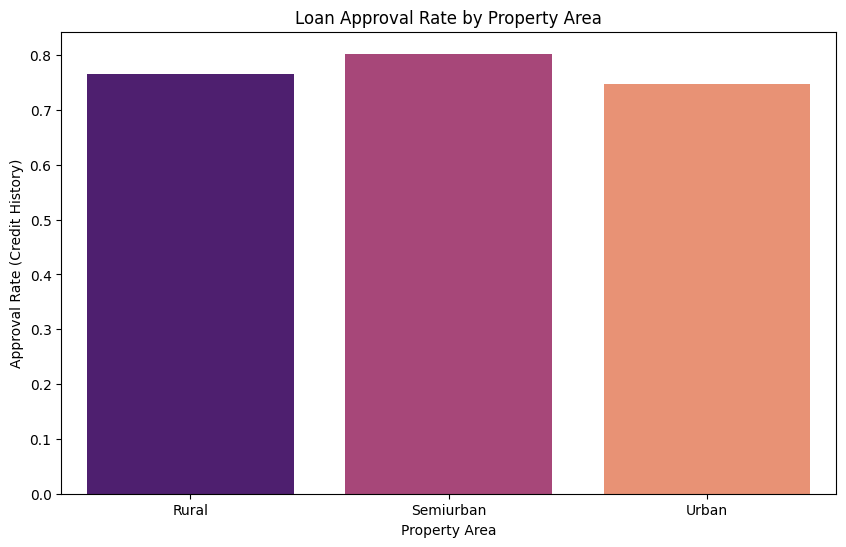

In [18]:
approval_rate = df.groupby('Property_Area')['Credit_History'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Property_Area', y='Credit_History', data=approval_rate, palette='magma')
plt.title('Loan Approval Rate by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Approval Rate (Credit History)')
plt.show()


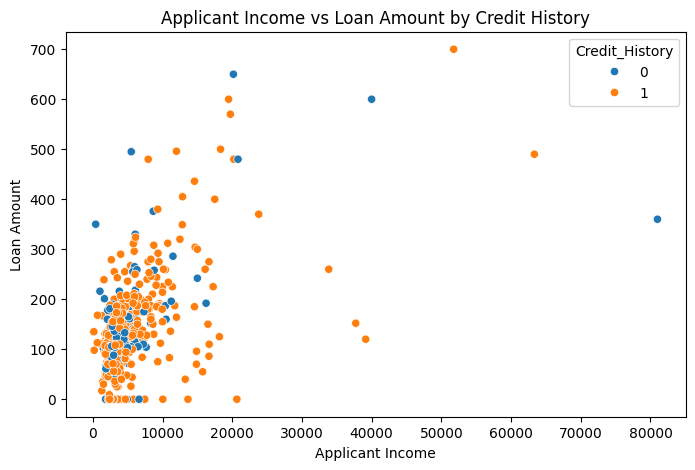

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Credit_History', data=df)
plt.title('Applicant Income vs Loan Amount by Credit History')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


In [20]:
# Create interactive scatter plot
fig = px.scatter(df, x='ApplicantIncome', y='LoanAmount', color='Credit_History',
                 title='Applicant Income vs Loan Amount (by Credit History)',
                 labels={'ApplicantIncome':'Applicant Income', 'LoanAmount':'Loan Amount'},
                 hover_data=['Credit_History'])

# Show the plot
fig.show()


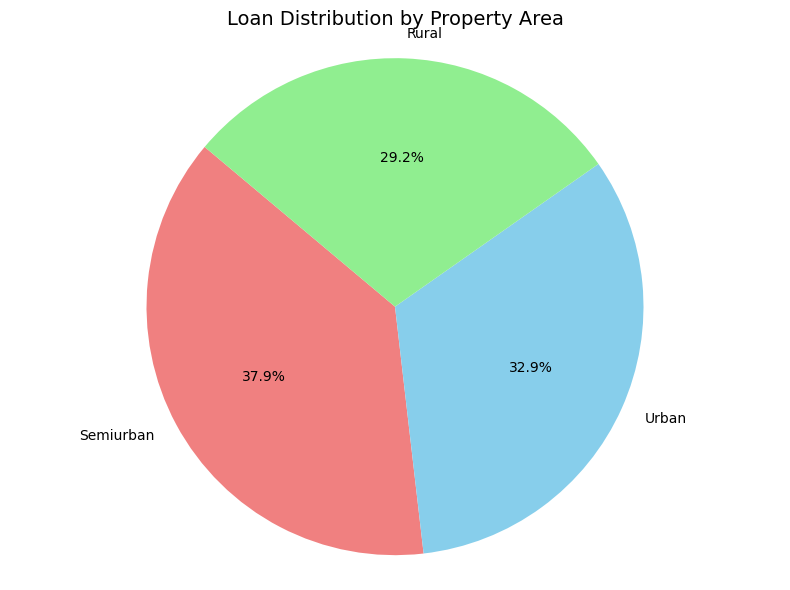

In [21]:
# Count loans by Property Area
df_property_area_counts = df['Property_Area'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
plt.pie(df_property_area_counts, labels=df_property_area_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen'])

# Customize the plot
plt.title('Loan Distribution by Property Area', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
# Create an interactive pie chart
fig = px.pie(df, names='Property_Area', 
             title='Distribution of Applicants by Property Area',
             hole=.8)

# Show the plot
fig.show()


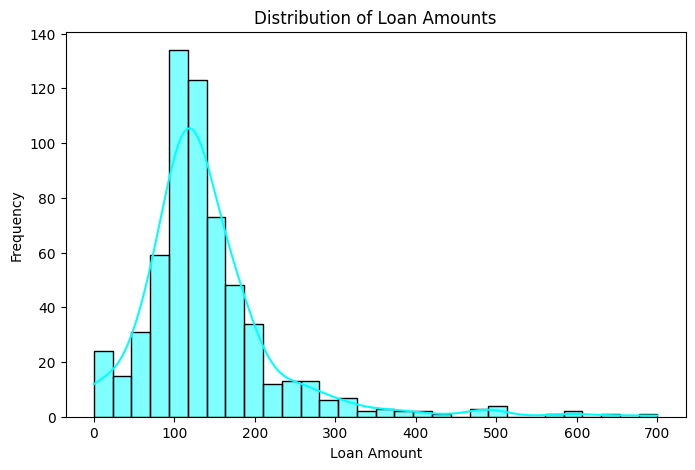

In [23]:
#Distribution of Loan Amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='cyan')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


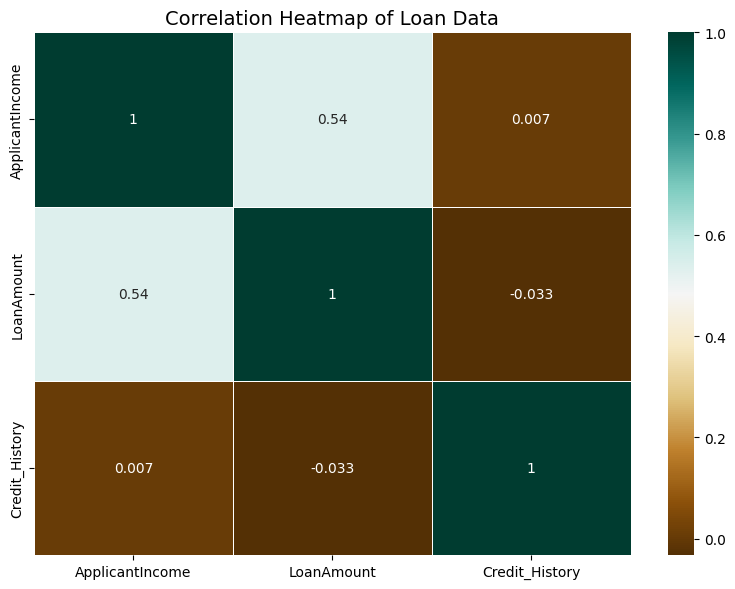

In [24]:
# Calculate correlation matrix
correlation = df[['ApplicantIncome', 'LoanAmount', 'Credit_History']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='BrBG', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of Loan Data', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# Exporting the Cleaned Data

In [25]:
# Saving the cleaned data into the chosen folder

# Path to save the cleaned data as a CSV file (you can change the file path)
file_path = 'C:/Users/Admin/Desktop/Capstone Project_Subha Poddar/Cleaned_Loan_Approval_Prediction.csv'

# Export the cleaned DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"Data has been successfully exported to {file_path}")


Data has been successfully exported to C:/Users/Admin/Desktop/Capstone Project_Subha Poddar/Cleaned_Loan_Approval_Prediction.csv
